In [50]:
%pip install imblearn


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [51]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
Data Info:
 None

Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left    

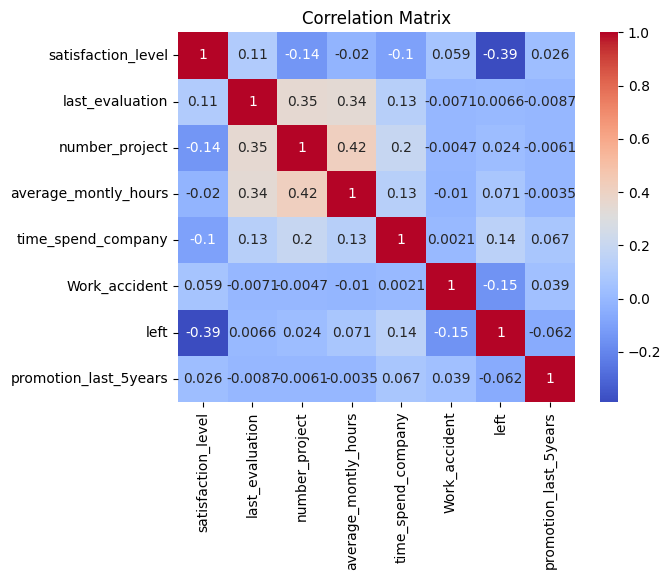

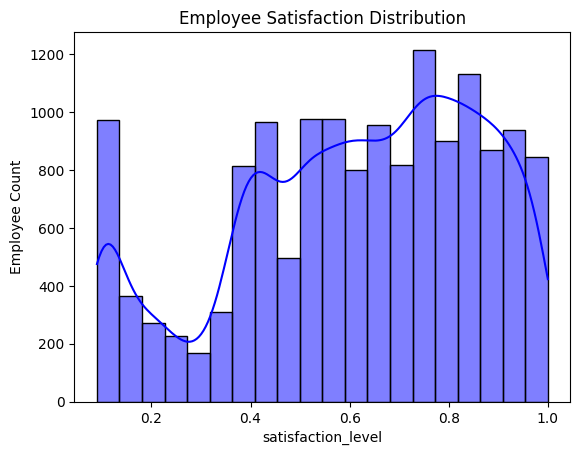

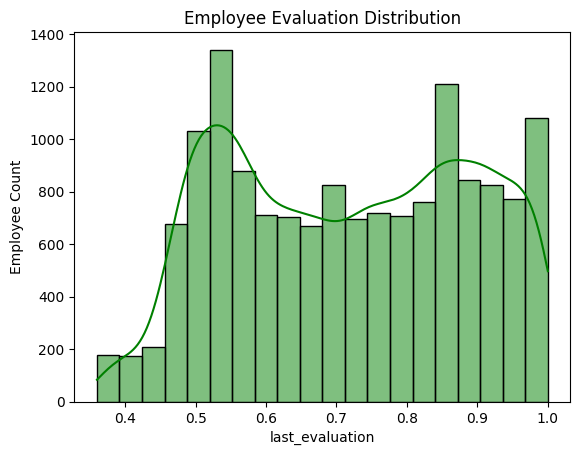

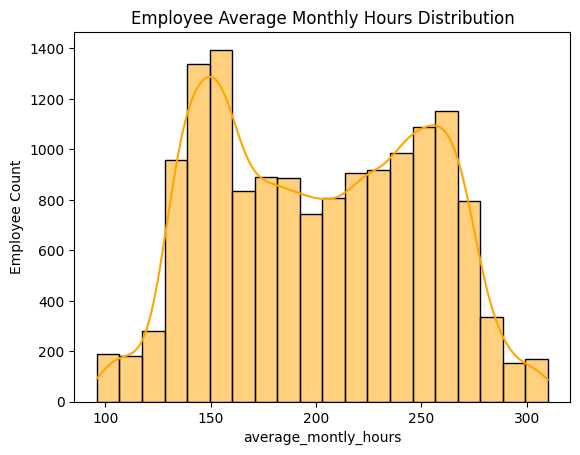

In [53]:
# Load dataset
data_path = "HR_comma_sep.csv"  
data = pd.read_csv(data_path)

# 1. Data Quality Checks
print("Data Info:\n", data.info())
print("\nMissing Values:\n", data.isnull().sum())
data.head()
# 2. Exploratory Data Analysis (EDA)
## 2.1 Correlation Matrix and Heatmap
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
# Correlation matrix is a table showing correlation coefficients between variables. 
# Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1.
# If two variables have high correlation, it means thery are strongly related.
# Values close to 1 mean that the two variables have a strong positive correlation.
# Values close to -1 mean that the two variables have a strong negative correlation.
# Values close to 0 mean that there is no correlation between the variables.
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 2.2 Distribution Plots
sns.histplot(data['satisfaction_level'], kde=True, bins=20, color='blue')
plt.title("Employee Satisfaction Distribution")
plt.ylabel("Employee Count")
plt.show()

sns.histplot(data['last_evaluation'], kde=True, bins=20, color='green')
plt.title("Employee Evaluation Distribution")
plt.ylabel("Employee Count")
plt.show()

sns.histplot(data['average_montly_hours'], kde=True, bins=20, color='orange')
plt.title("Employee Average Monthly Hours Distribution")
plt.ylabel("Employee Count")
plt.show()




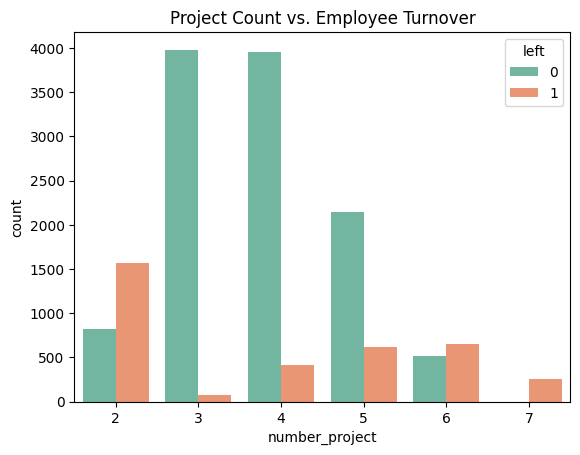

In [54]:
## 2.3 Bar Plot: Project Count vs. Turnover
sns.countplot(x='number_project', hue='left', data=data, palette='Set2')
plt.title("Project Count vs. Employee Turnover")
plt.show()

Inferences from the Above Plot:

* More than half of the employees with 2, 6, and 7 projects left the company.
* The majority of employees who stayed with the company had 3, 4, or 5 projects.
* All employees with 7 projects left the company.
* There is a noticeable increase in employee turnover as the project count increases.

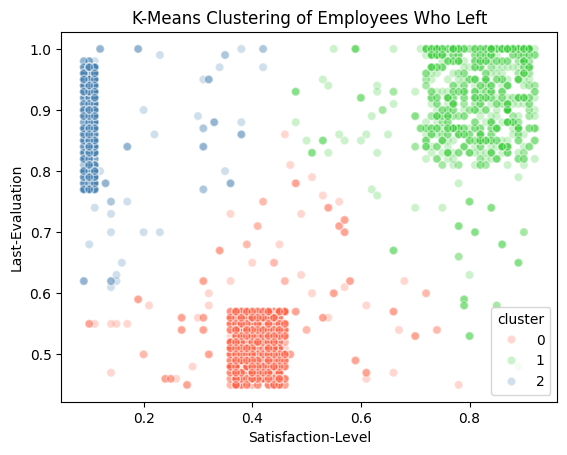

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# 3. Clustering of Employees Who Left
# We will use K-Means clustering to group employees who left based on their satisfaction level and last evaluation.
# Type: Unsupervised learning algorithm.
# Purpose: Clustering.
# Functionality: Partitions the data into k clusters based on feature similarity. Each data point is assigned to the nearest cluster centroid.
# Use Cases: Customer segmentation, image compression, anomaly detection.
# Strengths: Simple to implement, efficient for large datasets.
# Weaknesses: Requires the number of clusters k to be specified, sensitive to initial centroid placement and outlier

left_employees = data[data['left'] == 1][['satisfaction_level', 'last_evaluation']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(left_employees)
left_employees['cluster'] = kmeans.labels_

# Define a custom color palette
custom_palette = sns.color_palette(["#FF6347" , "#32CD32", "#4682B4"])

sns.scatterplot( 
    data=left_employees, 
    x='satisfaction_level', 
    y='last_evaluation', 
    hue='cluster', 
    palette=custom_palette,  # Use the custom color palette
    sizes=(10,6),
    linewidth=1,
    alpha=0.25
    )
plt.title("K-Means Clustering of Employees Who Left")
plt.xlabel("Satisfaction-Level")
plt.ylabel("Last-Evaluation")
plt.show()



There are three clusters for employees who left the company
* Cluster 0 (Red): Bad and sad employee. Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work. Employees who felt they were not fit for the job left.
* Cluster 1 (Green): Hard-working and happy employee. Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. They are geniuses and found another job opportunity.
* Cluster 2 (Blue): Hard-working and sad employee. Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.


In [78]:
# 4. Handle Class Imbalance with SMOTE
# SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address the issue of imbalanced datasets in machine learning. 
# It works by generating synthetic samples for the minority class to balance the class distribution. 
# This helps improve the performance of classifiers by providing more balanced training data.
# When using SMOTE:
# a. Imbalanced Datasets: When you have a dataset where one class is significantly underrepresented compared to the other classes.
# b. Classification Problems: Particularly useful in binary and multi-class classification problems where class imbalance can lead to biased model performance.
# c. Improving Model Performance: When you observe that your model is biased towards the majority class and performs poorly on the minority class.
## 4.1 Data Preprocessing
categrical_columns = ['sales','salary','left']
num_columns = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company', 'Work_accident','promotion_last_5years']
categorical_df = pd.get_dummies(data[categrical_columns], drop_first=True, dummy_na=True)
# Convert boolean columns to integers
categorical_df = categorical_df.astype(int)
# categorical_df.head()
numerical_df = data[num_columns]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

X = new_df.drop('left', axis=1) # X = new_df.iloc[:,1:] All rows, columns starting from index 1
y = new_df['left'] # y = new_df.iloc[:,0] All rows, column at index 0

## 4.2 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

## 4.3 SMOTE Oversampling
# a. random_state parameter: is used to control the randomness of various processes in machine learning algorithms. 
# It ensures reproducibility of results by setting a seed for the random number generator. 
# When you set a random_state value, you ensure that the same sequence of random numbers is generated each time you run the code, leading to consistent and reproducible results.
# b. sampling_strategy parameter: is used to specify the desired ratio of minority class to majority class after resampling.
# For example, setting sampling_strategy=0.5 means that the number of samples in the minority class will be half the number of samples in the majority class after resampling.
smote = SMOTE(random_state=123, sampling_strategy= 1.0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", X_train_res.shape, y_train_res.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (18284, 20) (18284,)



Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     11428
           1       0.61      0.35      0.44      3571

    accuracy                           0.79     14999
   macro avg       0.71      0.64      0.66     14999
weighted avg       0.77      0.79      0.77     14999



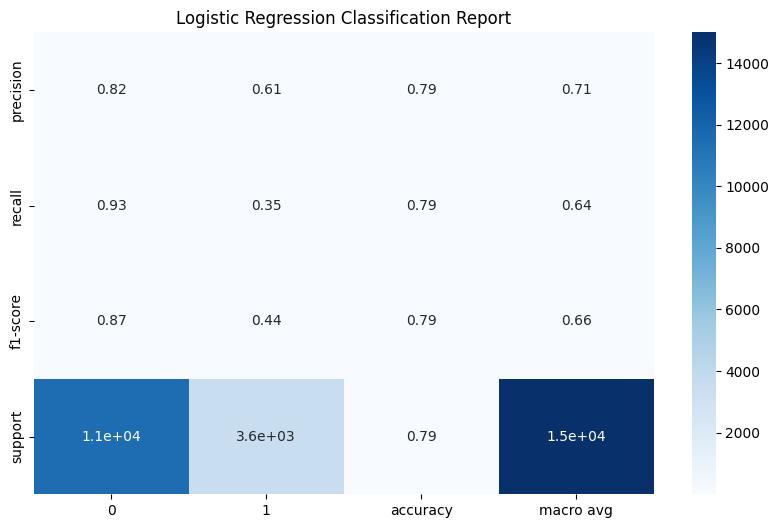


Random Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11428
           1       0.99      0.97      0.98      3571

    accuracy                           0.99     14999
   macro avg       0.99      0.98      0.99     14999
weighted avg       0.99      0.99      0.99     14999



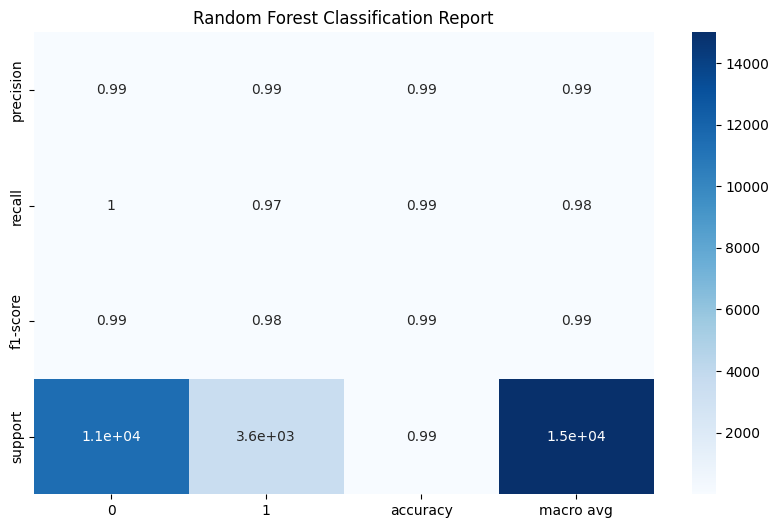


Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11428
           1       0.97      0.93      0.95      3571

    accuracy                           0.98     14999
   macro avg       0.97      0.96      0.97     14999
weighted avg       0.98      0.98      0.98     14999



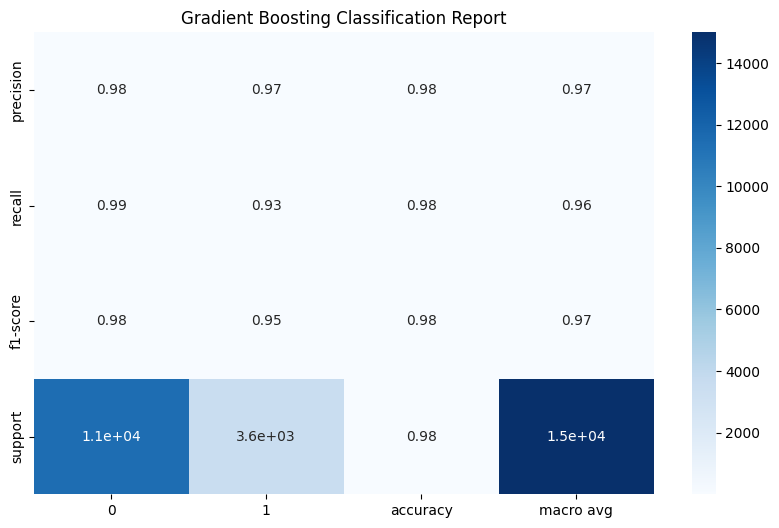

In [ ]:
# 5. Model Training with 5-Fold Cross-Validation
# Logistic Regression:
# Type: Supervised learning algorithm.
# Purpose: Classification.
# Functionality: Models the probability of a binary outcome based on one or more predictor variables using a logistic function.
# Use Cases: Binary classification problems (e.g., spam detection, disease diagnosis).
# Strengths: Simple, interpretable, works well with linearly separable data.
# Weaknesses: Assumes linear relationship between features and log-odds, not suitable for complex relationships.
#
# Random Forest:
# Type: Supervised learning algorithm.
# Purpose: Classification and regression.
# Functionality: An ensemble method that builds multiple decision trees and merges them to get a more accurate and stable prediction.
# Use Cases: Classification and regression tasks (e.g., credit scoring, stock price prediction).
# Strengths: Handles high-dimensional data, reduces overfitting, robust to outliers.
# Weaknesses: Can be computationally intensive, less interpretable than single decision trees.
#
# Gradient Boosting:
# Type: Supervised learning algorithm.
# Purpose: Classification and regression.
# Functionality: An ensemble method that builds models sequentially, each new model correcting errors made by the previous ones. It uses gradient descent to minimize the loss function.
# Use Cases: Classification and regression tasks (e.g., customer churn prediction, sales forecasting).
# Strengths: High predictive accuracy, handles complex relationships, reduces overfitting.
# Weaknesses: Can be computationally intensive, sensitive to hyperparameters, less interpretable.
from sklearn.model_selection import StratifiedKFold
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}

for model_name, model in models.items():
    print(f"\n{model_name}")

    # Apply 5-fold cross-validation and get predictions
    # cross_val_predict only generates predictions and does not fit the model.
    # score = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1') # scoring='accuracy'
    # print(f"Accuracy: {np.mean(score):.4f}")

    # Apply 5-fold cross-validation
    # Use StratifiedKFold to split the data and manually fit the model within each fold.
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_true, y_pred = [], []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)

    # Generate the classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    print(classification_report(y_true, y_pred))

    # Convert the classification report to a DataFrame for plotting
    report_df = pd.DataFrame(report).transpose()

    # Plot the classification report
    plt.figure(figsize=(10, 6))
    # report_df.iloc[:-1, :]
    # iloc: This is an indexer for selecting rows and columns by integer-location based indexing.
    # [:-1]: This slice notation selects all rows except the last one. In the context of the classification report, the last row typically contains the "accuracy" metric, which is a single value and not needed for the heatmap plot.
    # :: This selects all columns.
    # report_df.iloc[:-1, :].T
    # .T: This transposes the DataFrame, swapping rows and columns. After transposing, the metrics (precision, recall, f1-score, support) become the columns, and the classes (e.g., 0, 1) and averages (macro avg, weighted avg) become the rows.
    sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
    plt.title(f'{model_name} Classification Report')
    plt.show()

    # The classification_report from scikit-learn provides a detailed summary of the performance of a classification model. 
    # It includes several key metrics for each class, as well as overall metrics.
    
    # Metrics:
    # 1. Precision: The ratio of correctly predicted positive observations to the total predicted positives. It is also known as the positive predictive value.
    #       Formula: Precision = TP / (TP + FP)
    #       Interpretation: High precision indicates a low false positive rate.
    
    # 2. Recall: The ratio of correctly predicted positive observations to all observations in the actual class. It is also known as sensitivity or true positive rate.
    #       Formula: Recall = TP / (TP + FN)
    #       Interpretation: High recall indicates a low false negative rate.
    
    # 3. F1-Score: The weighted average of precision and recall. It considers both false positives and false negatives.
    #       Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
    #       Interpretation: The F1-score is useful when you need a balance between precision and recall.
    
    # 4. Support: The number of actual occurrences of the class in the dataset.
    #       Interpretation: Support is the number of true instances for each class.
    
    # Overall Metrics:
    # 1. Accuracy: The ratio of correctly predicted observations to the total observations.
    #       Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)
    #       Interpretation: Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observations to the total observations.
    
    # 2. Macro Average (macro avg): The average of the precision, recall, and F1-score for each class, without considering the class imbalance.
    #       Interpretation: Macro average treats all classes equally, regardless of their support.
    
    # 3. Weighted Average (weighted avg): The average of the precision, recall, and F1-score for each class, weighted by the number of true instances for each class (support).
    #       Interpretation: Weighted average accounts for class imbalance by giving more importance to classes with more instances.



Logistic Regression Confusion Matrix:
[[1721  564]
 [ 170  544]]

Random Forest Confusion Matrix:
[[2281    4]
 [   5  709]]

Gradient Boosting Confusion Matrix:
[[2228   57]
 [  46  668]]

Best Model: RandomForestClassifier(random_state=123)
Best AUC: 0.9995


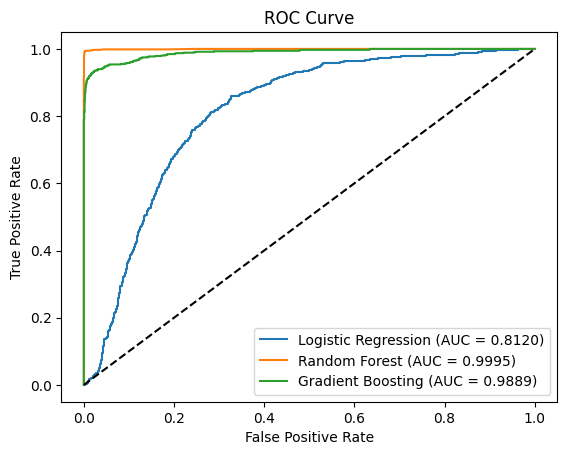

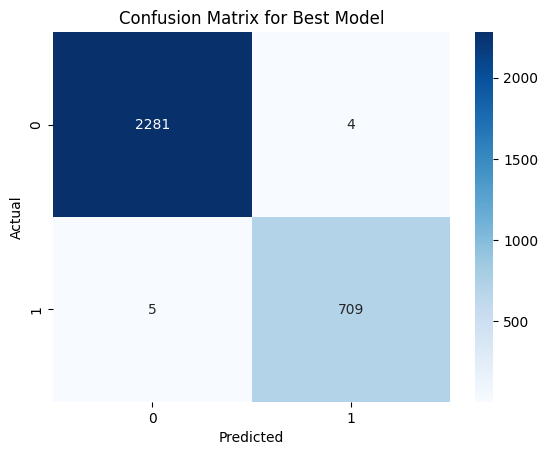

In [93]:
# 6. Train Models and Evaluate Performance
# ROC Curve: (Receiver Operating Characteristic)
# The ROC curve is a graphical representation of a classifier's performance across different threshold values. 
# It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

#   True Positive Rate (TPR): Also known as recall or sensitivity.
#       Formula: TPR = TP / (TP + FN)
#   False Positive Rate (FPR): The proportion of negative instances that are incorrectly classified as positive.
#       Formula: FPR = FP / (FP + TN)

# AUC: (Area Under the Curve)
# The AUC (Area Under the Curve) is a single scalar value that summarizes the performance of the classifier. 
# It represents the area under the ROC curve.

#   AUC Interpretation:
#       AUC = 1: Perfect classifier.
#       AUC = 0.5: Classifier with no discrimination ability (random guessing).
#       AUC > 0.5: Better than random guessing.
#       AUC < 0.5: Worse than random guessing.

best_model = None
best_auc = 0

for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    # print(f"\n{model_name} Classification Report:\n")
    # print(classification_report(y_test, y_pred))

    # Calculate ROC/AUC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})")

    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\n{model_name} Confusion Matrix:\n{conf_matrix}")

    if auc_score > best_auc:
        best_auc = auc_score
        best_model = model

print(f"\nBest Model: {best_model}\nBest AUC: {best_auc:.4f}")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for Model
y_best_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_best_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [97]:
# 7. Retention Strategies
# Predict Probabilities

#The predict_proba method returns an array with probabilities for both classes (class 0 and class 1)
# [:, 1]: This selects the second column of the array, which corresponds to the probability of the positive class (class 1).
probabilities = best_model.predict_proba(X_test)[:, 1] 

# pd.cut: This function is used to segment and sort data values into bins. It is useful for converting continuous data into categorical data.
# bins=[0, 0.2, 0.6, 0.9, 1]: Defines the bin edges. The probabilities are divided into four bins.
retention_categories = pd.cut(probabilities, bins=[0, 0.2, 0.6, 0.9, 1], labels=['Safe Zone', 'Low-Risk Zone', 'Medium-Risk Zone', 'High-Risk Zone'])

# Output Retention Strategies
test_results = pd.DataFrame({
    'Probability': probabilities,
    'Retention Category': retention_categories
})
print(test_results['Retention Category'].value_counts())

# Suggest Retention Strategies for Each Zone
print("\nRetention Strategies:")
print("Safe Zone: Regular engagement and acknowledgment.")
print("Low-Risk Zone: Recognize and reward efforts, offer support.")
print("Medium-Risk Zone: Provide growth opportunities and reduce workload.")
print("High-Risk Zone: Immediate intervention, conduct personalized discussions.")


Retention Category
Safe Zone           1124
High-Risk Zone       669
Low-Risk Zone         42
Medium-Risk Zone      39
Name: count, dtype: int64

Retention Strategies:
Safe Zone: Regular engagement and acknowledgment.
Low-Risk Zone: Recognize and reward efforts, offer support.
Medium-Risk Zone: Provide growth opportunities and reduce workload.
High-Risk Zone: Immediate intervention, conduct personalized discussions.
